In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 51                  
x_start, x_end = -1.0, 2.0     
y_start, y_end = -0.5, 0.5   
x = numpy.linspace(x_start, x_end, N)  
y = numpy.linspace(y_start, y_end, N)  
X, Y = numpy.meshgrid(x, y)

In [3]:
#freestream
u_inf = 1.0     
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [4]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [5]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [6]:
strength_source = numpy.loadtxt('NACA0012_sigma.txt')
x_source, y_source = numpy.loadtxt('NACA0012_x.txt'), numpy.loadtxt('NACA0012_y.txt')

In [1]:
# superposition of the source on the freestream
u_source = numpy.zeros((100), dtype=float)
v_source = numpy.zeros((100), dtype=float)
u = u_freestream
v = v_freestream
psi = psi_freestream 
for i in range(len(x_source)):
    ui, vi = get_velocity(strength_source[i], x_source[i], y_source[i], X, Y)
    psii = get_stream_function(strength_source[i], x_source[i], y_source[i], X, Y)
    u = u + ui
    v = v + vi
    psi = psi + psii

NameError: name 'numpy' is not defined

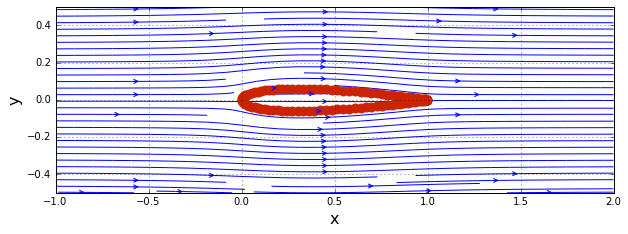

In [8]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')


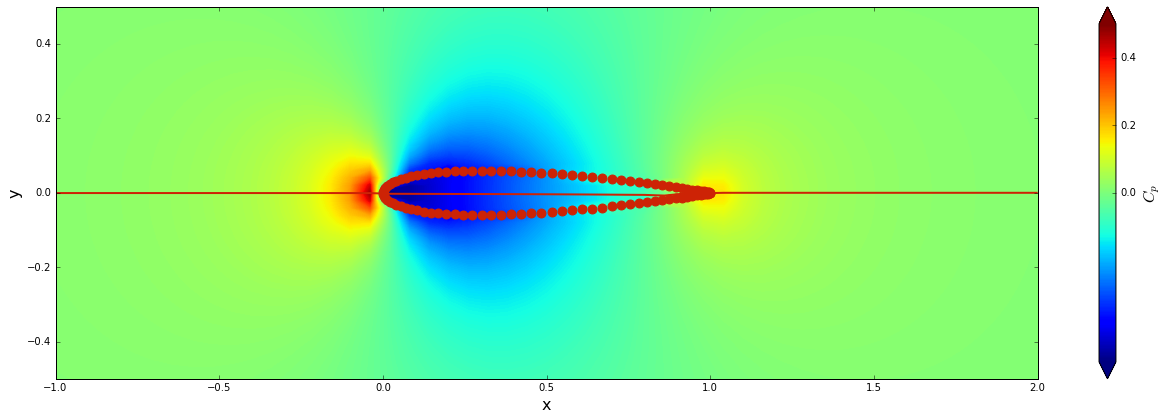

In [22]:
# compute the pressure coefficient field
cp = numpy.zeros((N, N), dtype=float)

cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 20
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.5, 1000), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([0, 0.2, 0.4 ,0.6 ,0.8 ,1.0])
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

In [10]:
numpy.max(cp)

0.47187837512752406

In [11]:
print('x=') 
numpy.argmax(cp)%51

x=


16

In [12]:
print('y=')
numpy.argmax(cp)//51

y=


25